In [6]:
import pandas as pd
import numpy as np
import warnings
import os

from geopy.geocoders import Nominatim


In [7]:
#!pip install geopy

In [8]:
warnings.filterwarnings('ignore')

In [9]:
# 1. **Magnitude**: Likely to be a strong predictor for the occurrence of a tsunami.
# 2. **Depth**: The depth of the earthquake can also be crucial; shallower earthquakes are more likely to trigger tsunamis.
# 3. **Latitude and Longitude**: These can be important if there are certain geographic regions that are more prone to tsunamis.
# 4. **Dmin**: Minimum distance to the station; could indicate how localized or widespread the seismic activity is.
# 5. **Gap**: Could help in indicating the reliability of the seismic reading.
# 6. **Sig**: An overall 'significance' score that takes into account various factors could be a good predictor.
# 7. **NST**: Number of stations that reported could be indicative of the event's magnitude.

# You might not want to include:

# 1. **CDI and MMI**: These are measures of the impact of the earthquake, which could be seen as outcomes rather than predictors.
# 2. **Year and Month**: Unless you have a reason to suspect seasonal or annual trends, these may not be helpful.

In [10]:
df = pd.read_csv('earthquake_1995-2023_fixed.csv')

In [11]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",Oceania,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",North Pacific,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,North Pacific,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",South Pacific,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",Asia,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [12]:
df = df.loc[df['country'] == 'Papua New Guinea']

In [13]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
18,"M 7.0 - New Guinea, Papua New Guinea",7.0,02-04-2023 18:04,7,7,green,1,781,us,105,6.450,31.0,mww,62.603,-4.2924,143.155,"New Guinea, Papua New Guinea",Asia,Papua New Guinea
25,"M 6.5 - 108 km NW of Kimbe, Papua New Guinea",6.5,01-03-2023 05:36,4,2,green,1,652,us,115,2.739,20.0,mww,598.925,-4.8138,149.487,"Kimbe, Papua New Guinea",Oceania,Papua New Guinea
48,"M 7.6 - 70 km E of Kainantu, Papua New Guinea",7.6,10-09-2022 23:47,8,8,yellow,1,965,us,272,3.158,12.0,mww,116.000,-6.2237,146.471,"Kainantu, Papua New Guinea",Oceania,Papua New Guinea
129,"M 7.0 - 114 km NNW of Popondetta, Papua New Gu...",7.0,17-07-2020 02:50,6,7,green,1,820,us,0,1.671,18.0,mww,73.000,-7.8470,147.755,"Popondetta, Papua New Guinea",Oceania,Papua New Guinea
165,"M 7.6 - 46km SSE of Namatanai, Papua New Guinea",7.6,14-05-2019 12:58,7,7,green,1,929,us,0,0.453,16.0,mww,10.000,-4.0510,152.597,"Namatanai, Papua New Guinea",Oceania,Papua New Guinea


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 18 to 990
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      81 non-null     object 
 1   magnitude  81 non-null     float64
 2   date_time  81 non-null     object 
 3   cdi        81 non-null     int64  
 4   mmi        81 non-null     int64  
 5   alert      30 non-null     object 
 6   tsunami    81 non-null     int64  
 7   sig        81 non-null     int64  
 8   net        81 non-null     object 
 9   nst        81 non-null     int64  
 10  dmin       81 non-null     float64
 11  gap        81 non-null     float64
 12  magType    81 non-null     object 
 13  depth      81 non-null     float64
 14  latitude   81 non-null     float64
 15  longitude  81 non-null     float64
 16  location   81 non-null     object 
 17  continent  81 non-null     object 
 18  country    81 non-null     object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [15]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,6.897531,2.765432,6.222222,0.358025,741.938272,186.617284,0.850481,11.124691,71.869358,-5.314323,150.131556
std,0.386967,3.147505,0.987421,0.482407,91.915633,204.560539,1.609007,9.540526,94.782700,1.035045,3.611450
min,6.500000,0.000000,2.000000,0.000000,650.000000,0.000000,0.000000,0.000000,10.000000,-7.847000,141.926000
25%,6.600000,0.000000,6.000000,0.000000,670.000000,0.000000,0.000000,0.000000,33.000000,-6.001000,147.867000
50%,6.800000,0.000000,6.000000,0.000000,711.000000,105.000000,0.000000,12.000000,39.000000,-5.462000,151.205000
75%,7.100000,6.000000,7.000000,1.000000,776.000000,397.000000,1.074000,17.700000,69.100000,-4.694000,152.792000
max,8.000000,9.000000,8.000000,1.000000,987.000000,640.000000,6.450000,38.400000,598.925000,-2.961000,155.512000


In [16]:
df.isnull().sum()/df.shape[0]*100

title         0.000000
magnitude     0.000000
date_time     0.000000
cdi           0.000000
mmi           0.000000
alert        62.962963
tsunami       0.000000
sig           0.000000
net           0.000000
nst           0.000000
dmin          0.000000
gap           0.000000
magType       0.000000
depth         0.000000
latitude      0.000000
longitude     0.000000
location      0.000000
continent     0.000000
country       0.000000
dtype: float64

# Dropping Unnecessary Data

In [17]:
## Drop unecessary columns and convert time into year and month.
#df.drop(['alert'],axis=1,inplace=True)
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [18]:
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,Year,Month
18,"M 7.0 - New Guinea, Papua New Guinea",7.0,7,7,green,1,781,us,105,6.450,31.0,mww,62.603,-4.2924,143.155,"New Guinea, Papua New Guinea",Asia,Papua New Guinea,2023,2
25,"M 6.5 - 108 km NW of Kimbe, Papua New Guinea",6.5,4,2,green,1,652,us,115,2.739,20.0,mww,598.925,-4.8138,149.487,"Kimbe, Papua New Guinea",Oceania,Papua New Guinea,2023,1
48,"M 7.6 - 70 km E of Kainantu, Papua New Guinea",7.6,8,8,yellow,1,965,us,272,3.158,12.0,mww,116.000,-6.2237,146.471,"Kainantu, Papua New Guinea",Oceania,Papua New Guinea,2022,10
129,"M 7.0 - 114 km NNW of Popondetta, Papua New Gu...",7.0,6,7,green,1,820,us,0,1.671,18.0,mww,73.000,-7.8470,147.755,"Popondetta, Papua New Guinea",Oceania,Papua New Guinea,2020,7
165,"M 7.6 - 46km SSE of Namatanai, Papua New Guinea",7.6,7,7,green,1,929,us,0,0.453,16.0,mww,10.000,-4.0510,152.597,"Namatanai, Papua New Guinea",Oceania,Papua New Guinea,2019,5


In [19]:
df.isnull().sum()

title         0
magnitude     0
cdi           0
mmi           0
alert        51
tsunami       0
sig           0
net           0
nst           0
dmin          0
gap           0
magType       0
depth         0
latitude      0
longitude     0
location      0
continent     0
country       0
Year          0
Month         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 18 to 990
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      81 non-null     object 
 1   magnitude  81 non-null     float64
 2   cdi        81 non-null     int64  
 3   mmi        81 non-null     int64  
 4   alert      30 non-null     object 
 5   tsunami    81 non-null     int64  
 6   sig        81 non-null     int64  
 7   net        81 non-null     object 
 8   nst        81 non-null     int64  
 9   dmin       81 non-null     float64
 10  gap        81 non-null     float64
 11  magType    81 non-null     object 
 12  depth      81 non-null     float64
 13  latitude   81 non-null     float64
 14  longitude  81 non-null     float64
 15  location   81 non-null     object 
 16  continent  81 non-null     object 
 17  country    81 non-null     object 
 18  Year       81 non-null     int64  
 19  Month      81 non-null     int64  
dtypes: float64

# EDA (need further analysis to new dataset, will be compelete by zihan on saturady

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

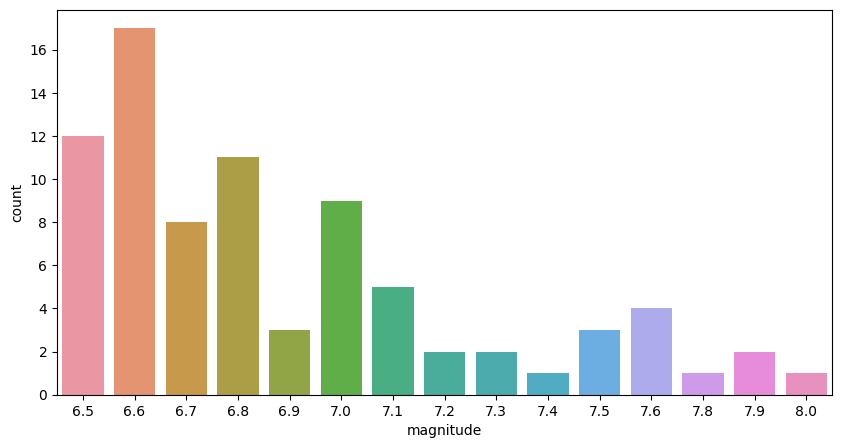

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale resulted from kaggle.

Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

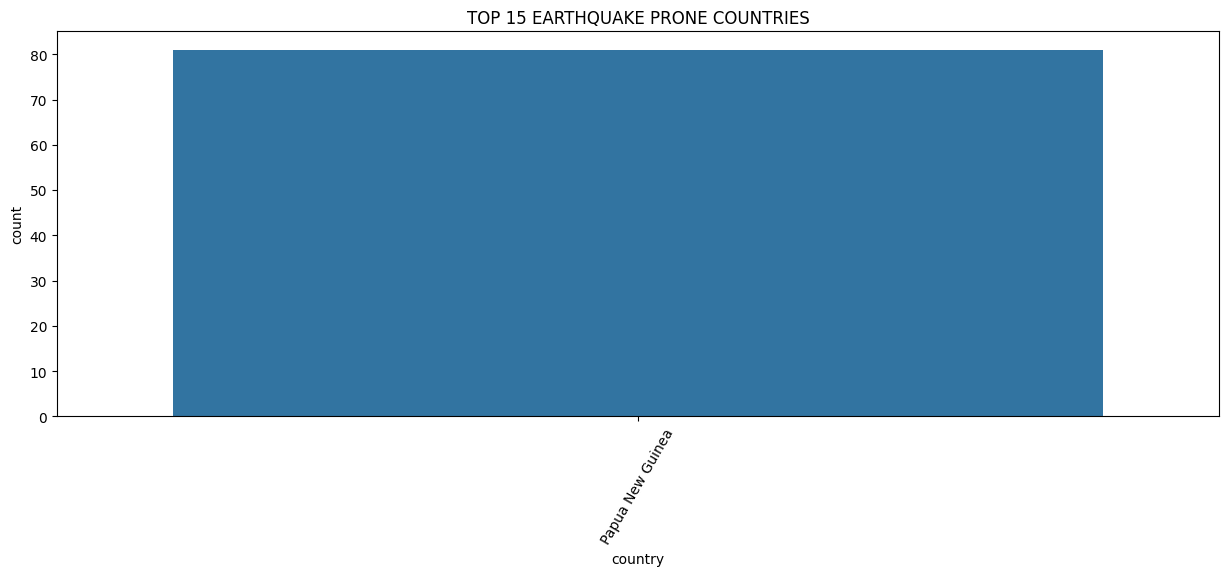

In [23]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

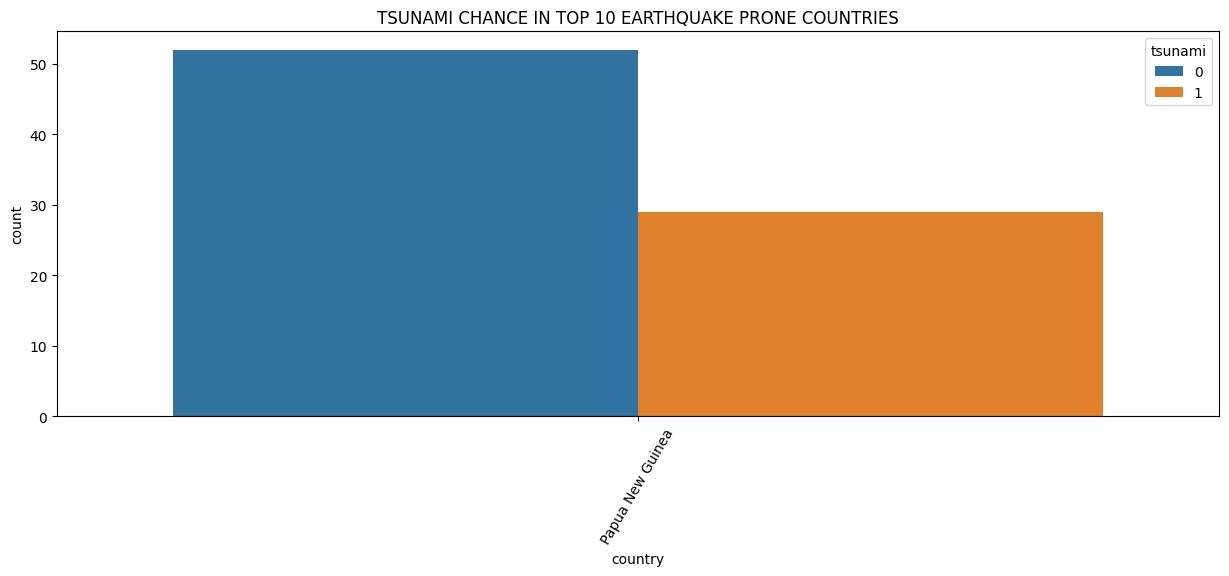

In [24]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

<Axes: xlabel='sig', ylabel='magnitude'>

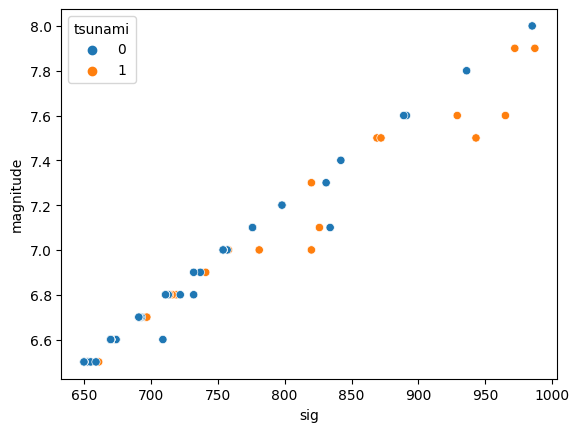

In [25]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

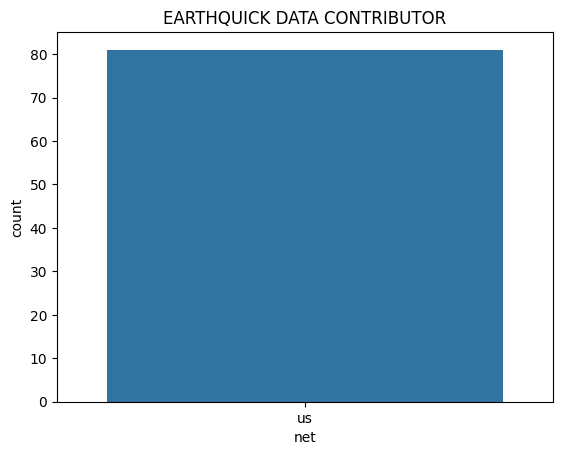

In [26]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'MagType')

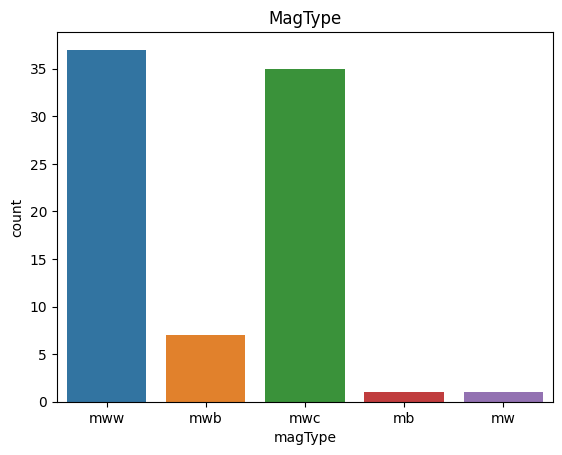

In [27]:
sns.countplot(x='magType',data=df)
plt.title('MagType')

Text(0.5, 1.0, 'Tsunami Distribution')

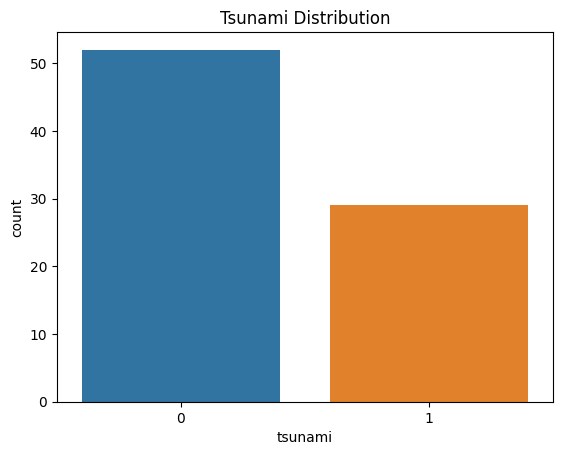

In [28]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

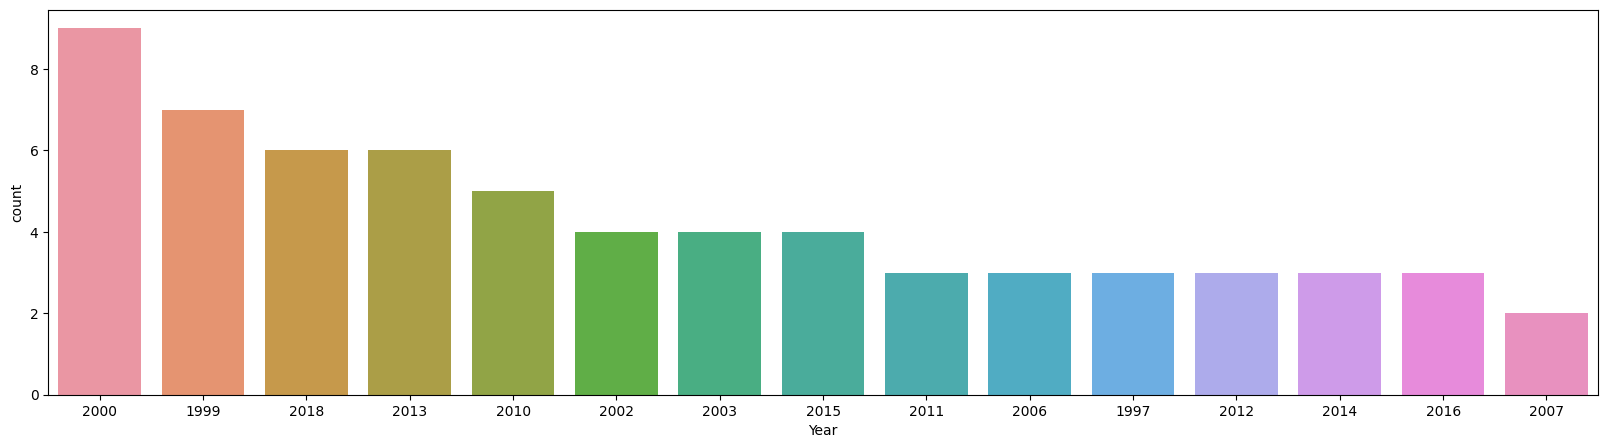

In [29]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')

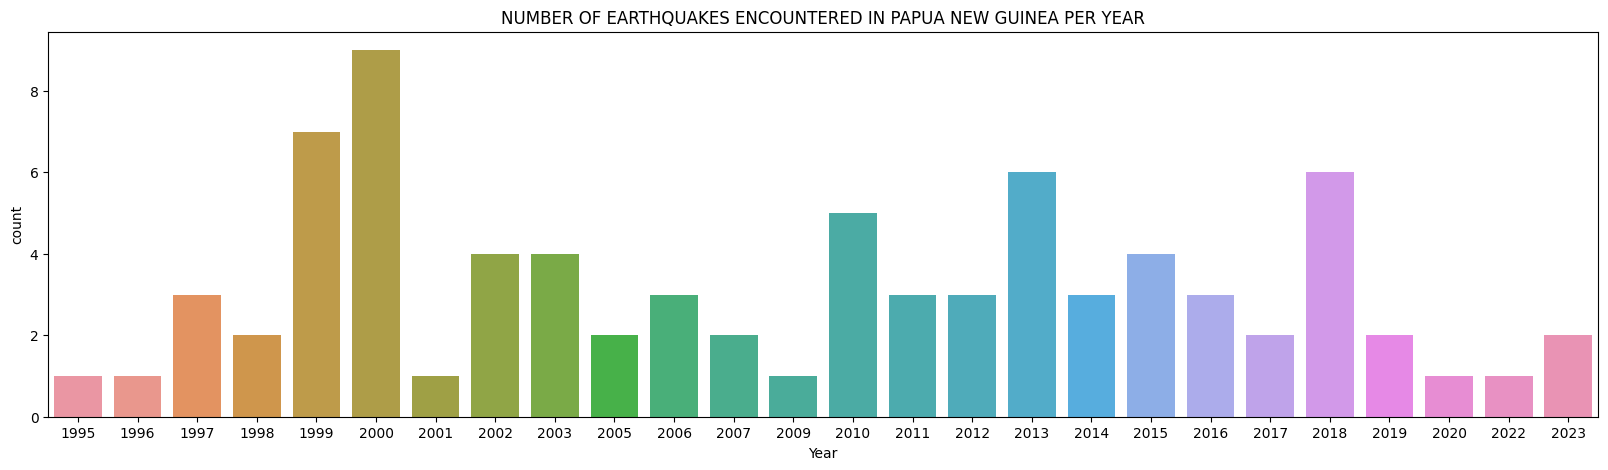

In [30]:
# Do this with japan as well
Papua=df[df['country']=='Papua New Guinea']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Papua)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')
#Papua New Guinea experiences at least one earthquake per year

# Feature Engineering Continue

In [31]:
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,Year,Month
18,"M 7.0 - New Guinea, Papua New Guinea",7.0,7,7,green,1,781,us,105,6.450,31.0,mww,62.603,-4.2924,143.155,"New Guinea, Papua New Guinea",Asia,Papua New Guinea,2023,2
25,"M 6.5 - 108 km NW of Kimbe, Papua New Guinea",6.5,4,2,green,1,652,us,115,2.739,20.0,mww,598.925,-4.8138,149.487,"Kimbe, Papua New Guinea",Oceania,Papua New Guinea,2023,1
48,"M 7.6 - 70 km E of Kainantu, Papua New Guinea",7.6,8,8,yellow,1,965,us,272,3.158,12.0,mww,116.000,-6.2237,146.471,"Kainantu, Papua New Guinea",Oceania,Papua New Guinea,2022,10
129,"M 7.0 - 114 km NNW of Popondetta, Papua New Gu...",7.0,6,7,green,1,820,us,0,1.671,18.0,mww,73.000,-7.8470,147.755,"Popondetta, Papua New Guinea",Oceania,Papua New Guinea,2020,7
165,"M 7.6 - 46km SSE of Namatanai, Papua New Guinea",7.6,7,7,green,1,929,us,0,0.453,16.0,mww,10.000,-4.0510,152.597,"Namatanai, Papua New Guinea",Oceania,Papua New Guinea,2019,5


In [32]:
## we will drop the year and month, since the tsunami is not a seasonale staff. It can occurs anytime.
df.drop(['Year', 'Month'], axis=1,inplace=True)#we have latitude and longitude

In [33]:
obj=df.select_dtypes(include=['object'])
obj

,title,alert,net,magType,location,continent,country
18,"M 7.0 - New Guinea, Papua New Guinea",green,us,mww,"New Guinea, Papua New Guinea",Asia,Papua New Guinea
25,"M 6.5 - 108 km NW of Kimbe, Papua New Guinea",green,us,mww,"Kimbe, Papua New Guinea",Oceania,Papua New Guinea
48,"M 7.6 - 70 km E of Kainantu, Papua New Guinea",yellow,us,mww,"Kainantu, Papua New Guinea",Oceania,Papua New Guinea
129,"M 7.0 - 114 km NNW of Popondetta, Papua New Gu...",green,us,mww,"Popondetta, Papua New Guinea",Oceania,Papua New Guinea
165,"M 7.6 - 46km SSE of Namatanai, Papua New Guinea",green,us,mww,"Namatanai, Papua New Guinea",Oceania,Papua New Guinea
...,...,...,...,...,...,...,...
908,"M 7.2 - 117 km N of Finschhafen, Papua New Guinea",NaN,us,mwc,"Finschhafen, Papua New Guinea",Oceania,Papua New Guinea
920,"M 6.6 - 64 km NNE of Angoram, Papua New Guinea",NaN,us,mwc,"Angoram, Papua New Guinea",Oceania,Papua New Guinea
931,"M 6.5 - 49 km W of Finschhafen, Papua New Guinea",NaN,us,mwc,"Finschhafen, Papua New Guinea",Oceania,Papua New Guinea
956,"M 7.2 - 58 km WSW of Panguna, Papua New Guinea",NaN,us,mwc,"Panguna, Papua New Guinea",Oceania,Papua New Guinea


In [34]:
obj.nunique()

title        81
alert         2
net           1
magType       5
location     20
continent     2
country       1
dtype: int64

In [35]:
## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj.drop(['net','country', 'continent'],axis=1,inplace=True)
df.drop(['net','country', 'continent','magType','location','alert'],axis=1,inplace=True)

In [36]:
## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,title,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,title,alert,magType,location
18,"M 7.0 - New Guinea, Papua New Guinea",7.0,7,7,1,781,105,6.450,31.0,62.603,-4.2924,143.155,59,0,4,13
25,"M 6.5 - 108 km NW of Kimbe, Papua New Guinea",6.5,4,2,1,652,115,2.739,20.0,598.925,-4.8138,149.487,1,0,4,7
48,"M 7.6 - 70 km E of Kainantu, Papua New Guinea",7.6,8,8,1,965,272,3.158,12.0,116.000,-6.2237,146.471,76,1,4,5
129,"M 7.0 - 114 km NNW of Popondetta, Papua New Gu...",7.0,6,7,1,820,0,1.671,18.0,73.000,-7.8470,147.755,52,0,4,16
165,"M 7.6 - 46km SSE of Namatanai, Papua New Guinea",7.6,7,7,1,929,0,0.453,16.0,10.000,-4.0510,152.597,74,0,4,11


           magnitude       cdi       mmi   tsunami       sig       nst  \
magnitude   1.000000       NaN  0.446364       NaN  0.984719       NaN   
cdi              NaN  1.000000       NaN  0.533485  0.386652       NaN   
mmi         0.446364       NaN  1.000000       NaN  0.453550       NaN   
tsunami          NaN  0.533485       NaN  1.000000       NaN -0.478421   
sig         0.984719  0.386652  0.453550       NaN  1.000000       NaN   
nst              NaN       NaN       NaN -0.478421       NaN  1.000000   
dmin             NaN  0.420750       NaN  0.712209       NaN -0.417934   
gap              NaN  0.410051       NaN  0.391599       NaN       NaN   
depth            NaN       NaN -0.661304       NaN       NaN       NaN   
latitude         NaN       NaN       NaN       NaN       NaN       NaN   
longitude        NaN       NaN       NaN       NaN       NaN       NaN   
title       0.921845       NaN  0.432080       NaN  0.899618       NaN   
alert            NaN -0.448706       N

<Axes: >

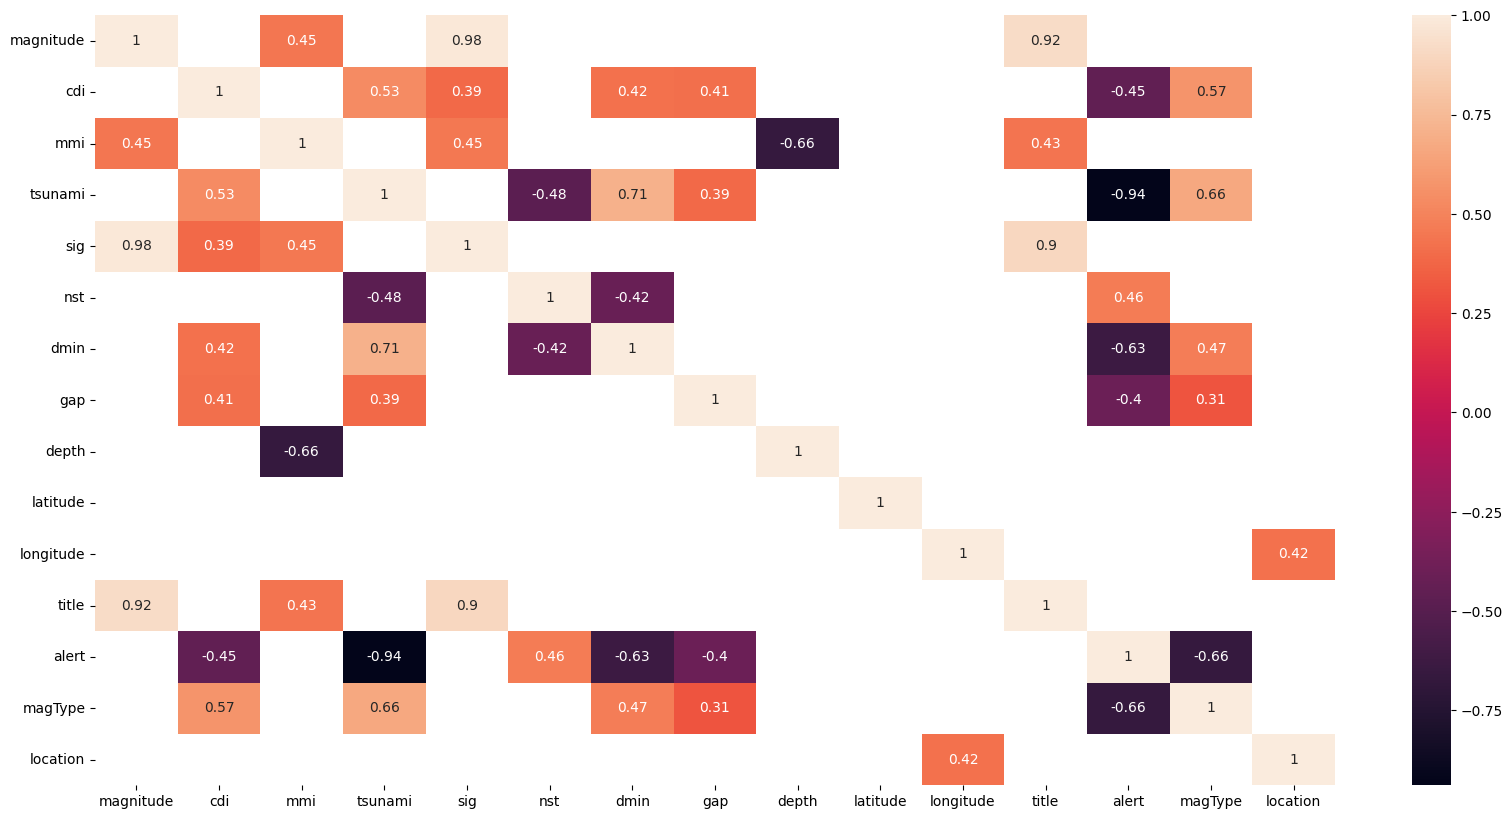

In [37]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
print(d)
sns.heatmap(d,annot=True)

In [38]:
obj.drop(['title'],axis=1,inplace=True)
df.drop(['title','sig'],axis=1,inplace=True)

# Scaling and model building

In [39]:
# Same model setting from the baseline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [40]:
# Prepocess dataset obtain tree and test dataset.
sc = StandardScaler()
x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

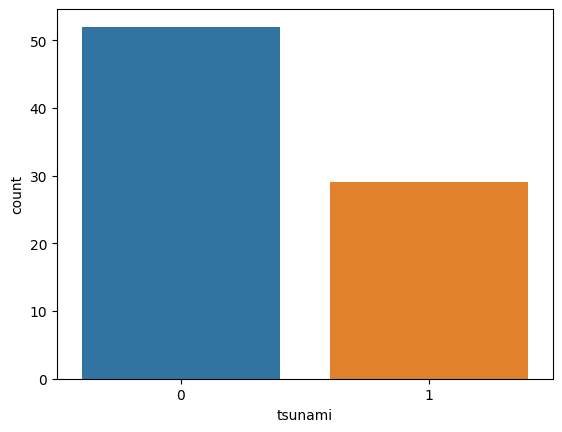

In [41]:
sns.countplot(x=y,data=df)

# Handling data imbalance

In [42]:
sm=SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [43]:
x_train_res.head()

,magnitude,cdi,mmi,nst,dmin,gap,depth,latitude,longitude,alert,magType,location
0,1.826629,1.353755,0.792594,-0.917968,-0.248574,0.514194,-0.656816,1.228154,0.686928,-1.445418,0.886325,0.594497
1,-0.513639,0.714372,-0.226455,-0.917968,0.410569,0.408725,-0.338331,-0.182841,0.353974,-1.445418,0.886325,-0.273147
2,0.266450,0.394681,-0.226455,1.029951,-0.531869,0.166146,-0.295866,-0.419659,0.176492,0.742972,0.886325,-0.273147
3,1.046540,-0.884085,-2.264554,-0.342447,-0.531869,1.357947,3.329561,1.358423,1.057496,-1.445418,0.886325,-0.056236
4,1.566599,1.993138,1.811643,-0.917968,2.895179,0.619663,-0.495344,-0.734542,-2.055552,-0.351223,0.886325,2.112876


In [44]:
y_train_res.head()

0    1
1    1
2    0
3    1
4    1
Name: tsunami, dtype: int64

In [45]:
# Tree Models
models = {
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [46]:
for name,model in models.items():
    model.fit(x_train_res,y_train_res)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.64      0.78        11

    accuracy                           0.76        17
   macro avg       0.80      0.82      0.76        17
weighted avg       0.86      0.76      0.77        17

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

.........................................................|
Model:  xg
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00    

# Grid Search: Hyperparameter

In [47]:
#XG

In [48]:
# Model: XG boosted tree
model_xg=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid_xg= GridSearchCV(model_xg, params, cv=5)
grid_xg.fit(x_train_res,y_train_res)
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.9894736842105264


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Axes(0.125,0.11;0.62x0.77)


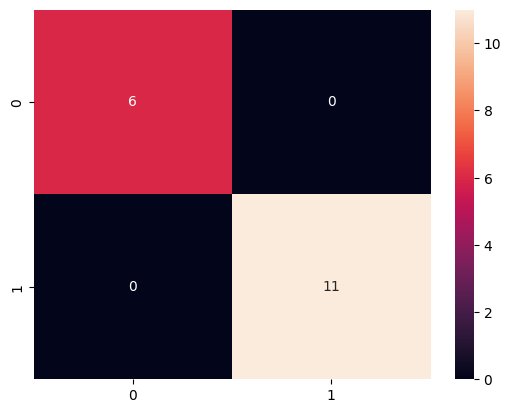

In [49]:
# Result of XG
p_xg = grid_xg.predict(x_test)
print(classification_report(y_test,p_xg))
print(sns.heatmap(confusion_matrix(y_test,p_xg),annot=True))

In [50]:
# Random forest

In [51]:
# Model Random forest
model_rf=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf= GridSearchCV(model_rf, params, cv=5)
grid_rf.fit(x_train_res,y_train_res)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.9894736842105264


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        11

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Axes(0.125,0.11;0.62x0.77)


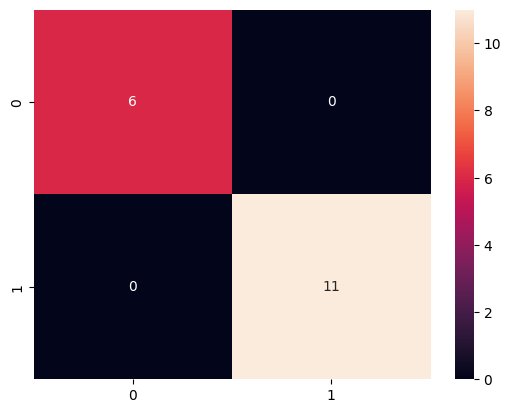

In [52]:
# Results of Random forest
p_rf = grid_rf.predict(x_test)
print(classification_report(y_test,p_rf))
print(sns.heatmap(confusion_matrix(y_test,p_rf),annot=True))

In [53]:
final_features = df.columns.tolist()
final_features

['magnitude',
 'cdi',
 'mmi',
 'tsunami',
 'nst',
 'dmin',
 'gap',
 'depth',
 'latitude',
 'longitude',
 'alert',
 'magType',
 'location']

In [54]:
# Model Random forest
model_dt=DecisionTreeClassifier()
params = {
    'max_depth': [3, 4, 5, 7, 10]
}

grid_dt= GridSearchCV(model_dt, params, cv=5)
grid_dt.fit(x_train_res,y_train_res)
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 4}
0.9894736842105264


# Try out nested cross vlidation technique to manupilate with the result

XG

In [55]:
# Define the outer loop - 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = xgb.XGBClassifier ()

    # Define search space for hyperparameters
    params = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.9846153846153847



Random Forest


In [56]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

# Outer loop for cross-validation
for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = RandomForestClassifier()

    # Define search space for hyperparameters
    params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_features': ['sqrt', 'log2']}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.9692307692307693
